# Team 5 - Global Terrorism


### What is your data about?
Information on 180,000 terrorist attacks
Around the world from 1970 through 2017. 
- It includes systematic data on domestic as well as international terrorist. 
- There are no plots, conspiracies and unsuccessful attacks. 

### Target Audience: 
- Business Invester who want to find a safe place to invest their money without the fear about terrorist attacks.

### Data details
- Incidents location
- Date and time the incident happened
- Incident information
  - Attack type
  - Attack target
  - Group of Perpetrator 
  - Incident Motive

### Evaluation metrics
Based on 2 metrics
- Casualties: a combination of killed and wounded victims
- Damaged Property value: the estimation of damaged property by USD.

### Hypothesis:
- Which is the most countries was aim by terrorism?
- Where is the most dangerous place to to stay in terms of terrorism?
- Where is the place we can get least damage from a terrorist attack?




### Exploration ideas:
- The rise of all terrorism around the world
- Top 10 nationality of target victim and a casuality 
- Top 10 Countries that most affected by terrorism
- Top 10 terrorism Activities by Type of attack and target
- What is the common motive of all kind terrorism in the world
- Top 10 Terrorist Groups with Highest Terror Attacks
- Growth of damaged property value and casuality of US
- Which US target that was attacked mostly?




# Import data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fill the blanks
terr = pd.read_csv('drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/05-global-terrorism/terrorism.csv',encoding='latin-1')


In [ ]:
# Show a summary of the data
terr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# Show a sample
terr.sample(10)

eventid  ...                                            related
148301  201505190076  ...                                                NaN
34033   198804060003  ...                                                NaN
71273   200010230008  ...                                                NaN
36845   198901110004  ...                                                NaN
131759  201405130012  ...  201405130009, 201405130010, 201405130011, 2014...
74919   200301030011  ...                                                NaN
174421  201705020031  ...                                                NaN
44714   199011280007  ...                                                NaN
168518  201610260020  ...                                                NaN
45766   199103130001  ...                                                NaN

[10 rows x 135 columns]

# Clean data

### Check data duplication

In [ ]:
# Check if ID column is unique
terr['eventid'].nunique() == terr.shape[0]

True

### Rename used columns

In [ ]:
# Rename used columns
terr.rename(columns={'iyear':'Year','imonth':'Month','propvalue':'DamagedPropertyValue',
                       'iday':'Day','country_txt':'Country','latitude':'Latitude','longitude':'Longitude',
                       'region_txt':'Region','attacktype1_txt':'AttackType','city':'City',
                       'target1':'Target','nkill':'Killed','nkillus':'KilledUS',
                       'nwound':'Wounded','nwoundus':'WoundedUS','eventid':'ID',
                       'gname':'Group','targtype1_txt':'TargetType','natlty1_txt':'TargetNationality',
                       'weaptype1_txt':'WeaponType','motive':'Motive'},inplace=True)


### Get used columns

In [ ]:
# Get columns
terr=terr[['Year','Month','Day','Country',
           'Region','City','WoundedUS',
           'KilledUS','AttackType','ID','Latitude','Longitude',
           'Killed','Wounded','Target','DamagedPropertyValue',
           'Group','TargetType','WeaponType',
           'Motive','TargetNationality']]


In [ ]:
# Drop data before 1997
terr.drop(labels=terr[terr['Year'] < 1997].index, axis=0, inplace=True)


In [ ]:
# Show a summary of the data 
terr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117381 entries, 64310 to 181690
Data columns (total 21 columns):
Year                    117381 non-null int64
Month                   117381 non-null int64
Day                     117381 non-null int64
Country                 117381 non-null object
Region                  117381 non-null object
City                    116947 non-null object
WoundedUS               113785 non-null float64
KilledUS                113984 non-null float64
AttackType              117381 non-null object
ID                      117381 non-null int64
Latitude                116246 non-null float64
Longitude               116246 non-null float64
Killed                  113034 non-null float64
Wounded                 108968 non-null float64
Target                  117177 non-null object
DamagedPropertyValue    28925 non-null float64
Group                   117381 non-null object
TargetType              117381 non-null object
WeaponType              117381 non-nu

### Manipulate **data**

In [ ]:
# Check for missing data
terr.isnull().sum()


Year                        0
Month                       0
Day                         0
Country                     0
Region                      0
City                      434
WoundedUS                3596
KilledUS                 3397
AttackType                  0
ID                          0
Latitude                 1135
Longitude                1135
Killed                   4347
Wounded                  8413
Target                    204
DamagedPropertyValue    88456
Group                       0
TargetType                  0
WeaponType                  0
Motive                  67880
TargetNationality        1178
dtype: int64

In [ ]:
# Fill NaN to city, Target, Summary, Motive
terr['City'].fillna("Unknown", inplace=True)
terr['Target'].fillna("Unknown", inplace=True)
terr['Region'] = terr['Region'].astype('category')
terr['Motive'].fillna("Unknown", inplace=True)

In [ ]:
# Fill NaN to 0 for Killed and Wounded
terr['Killed'].fillna(0, inplace=True)
terr['Killed'] = terr['Killed'].astype(int) 
terr['Wounded'].fillna(0, inplace=True)
terr['Wounded'] = terr['Wounded'].astype(int) 
terr['KilledUS'].fillna(0, inplace=True)
terr['KilledUS'] = terr['KilledUS'].astype(int)
terr['WoundedUS'].fillna(0, inplace=True)
terr['WoundedUS'] = terr['WoundedUS'].astype(int)


In [ ]:
# Fill NaN to Nationality False
terr['TargetNationality'].fillna("No data", inplace=True)
terr['TargetNationality'] = terr['TargetNationality'].astype('category')

# File NaN to Property Damage
terr['DamagedPropertyValue'].fillna(0, inplace=True)
terr['DamagedPropertyValue'] = terr['DamagedPropertyValue'].apply(lambda x: 0 if x < 0 else x)


In [ ]:
# Change data type
terr['Country'] = terr['Country'].astype('category')
terr['City'] = terr['Country'].astype('category')
terr['Group'] = terr['Group'].astype('category')
terr['WeaponType'] = terr['WeaponType'].astype('category')
terr['Target'] = terr['Target'].astype('category')


In [ ]:
terr[terr['Latitude'].isnull()]

Year  Month  Day  ...  WeaponType   Motive TargetNationality
64327   1997      1    3  ...       Melee  Unknown          Colombia
64366   1997      1    7  ...  Explosives  Unknown           Algeria
64387   1997      1   10  ...    Firearms  Unknown             India
64401   1997      1   12  ...       Melee  Unknown           Algeria
64402   1997      1   12  ...       Melee  Unknown           Algeria
...      ...    ...  ...  ...         ...      ...               ...
180885  2017     11   28  ...    Firearms  Unknown          Cameroon
181112  2017     12   11  ...  Explosives  Unknown              Iraq
181300  2017     12   13  ...     Unknown  Unknown            Turkey
181351  2017     12   16  ...     Unknown  Unknown            Canada
181542  2017     12   25  ...     Unknown  Unknown              Chad

[1135 rows x 21 columns]

In [ ]:
# Check for missing data
terr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117381 entries, 64310 to 181690
Data columns (total 21 columns):
Year                    117381 non-null int64
Month                   117381 non-null int64
Day                     117381 non-null int64
Country                 117381 non-null category
Region                  117381 non-null category
City                    117381 non-null category
WoundedUS               117381 non-null int64
KilledUS                117381 non-null int64
AttackType              117381 non-null object
ID                      117381 non-null int64
Latitude                116246 non-null float64
Longitude               116246 non-null float64
Killed                  117381 non-null int64
Wounded                 117381 non-null int64
Target                  117381 non-null category
DamagedPropertyValue    117381 non-null float64
Group                   117381 non-null category
TargetType              117381 non-null object
WeaponType              117381 non

#### Add casualties column

In [ ]:
# Add casualities
terr['Casualities']= terr['Killed']+terr['Wounded']


In [ ]:
IsSuccessfull = (terr['Casualities'] > 0) + (terr['DamagedPropertyValue'] > 0)
IsSuccessfull.value_counts()
terr['IsSuccessfull'] = IsSuccessfull

In [ ]:
terr.groupby('Country')['Casualities'].mean().sort_values().head(40)

Country
New Zealand             0.000000
Iceland                 0.000000
Cyprus                  0.000000
Portugal                0.000000
Belize                  0.000000
Dominica                0.000000
Togo                    0.000000
Slovenia                0.000000
Vietnam                 0.125000
Ireland                 0.135593
Malta                   0.166667
Montenegro              0.200000
Zambia                  0.222222
Greece                  0.245253
Papua New Guinea        0.250000
Argentina               0.277778
Cuba                    0.333333
Bahamas                 0.333333
Swaziland               0.375000
United Arab Emirates    0.400000
Estonia                 0.400000
Hungary                 0.423077
Malawi                  0.500000
Chile                   0.504762
Malaysia                0.629032
Sweden                  0.633333
Comoros                 0.666667
Austria                 0.700000
Serbia-Montenegro       0.727273
Ecuador                 0.743590
Ur

In [ ]:
# Create new ID
terr.drop(columns=["ID"], inplace=True)
terr.reset_index(drop=True, inplace=True)


In [ ]:
terr.sample(1)

Year  Month  Day  ... TargetNationality Casualities IsSuccessfull
41094  2012      1   26  ...              Mali           0         False

[1 rows x 22 columns]

In [ ]:
# Export to csv file
terr.to_csv('/content/sample_data/clean_terrorism.csv')

## Exploration data

### The rise of all terrorism around the world

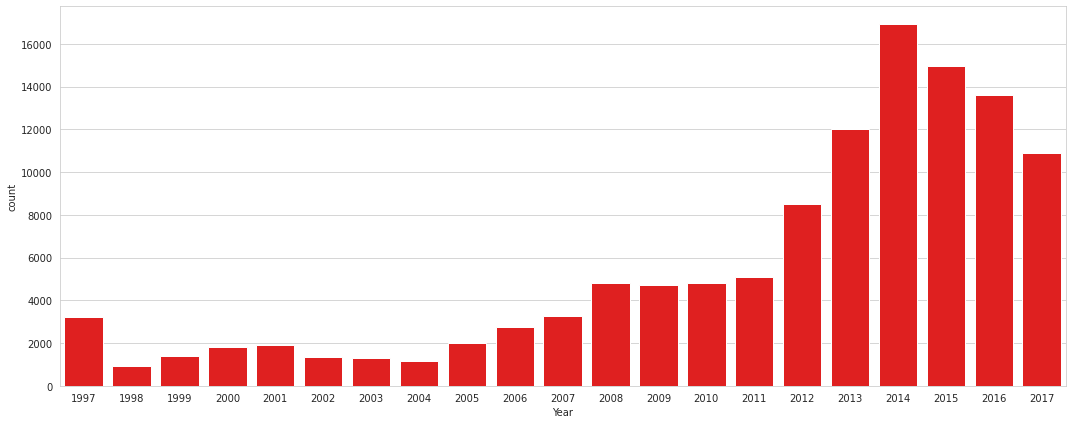

In [ ]:
# number of terrorism around the world from 1997 to 2017 
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Year', data=terr, color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.tight_layout()
plt.show()

### Top 10 nationality of target victim and a casuality

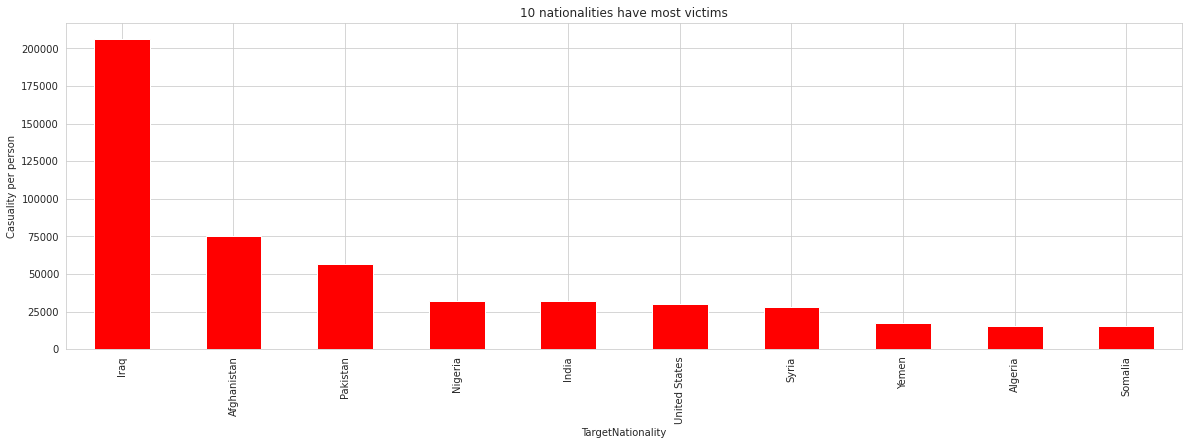

In [ ]:
# Select 10 nationalities have most victim
top10_casuality = terr.groupby('TargetNationality').sum().sort_values('Casualities', ascending = False).head(10)['Casualities']
# Plot
top10_casuality.plot.bar(color = "red",figsize = (20,6))
plt.ylabel('Casuality per person')
plt.title('10 nationalities have most victims')
plt.show()

### Top 10 Countries that most affected by terrorism

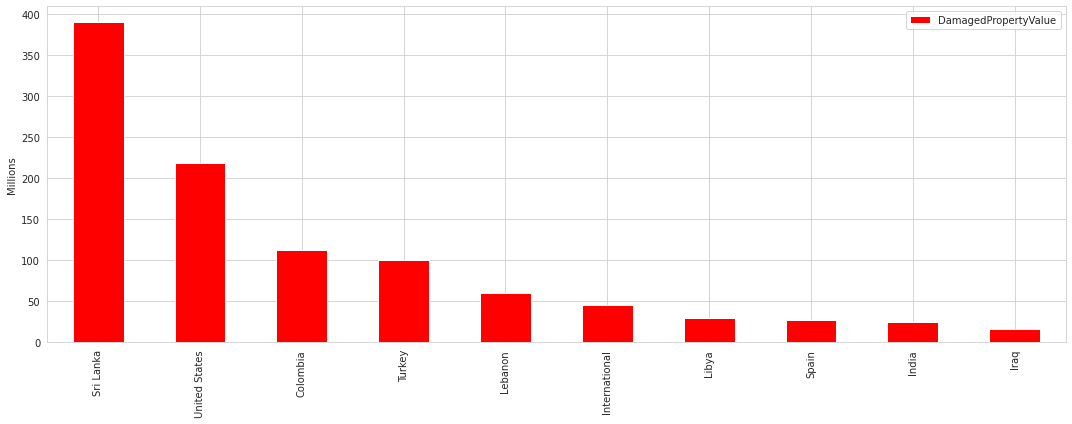

In [ ]:
#top 10 Countries that most affected by terrorism
top10country = terr.groupby('Country', as_index=False)['DamagedPropertyValue'].sum().sort_values('DamagedPropertyValue', ascending=False).head(10)
top10country['DamagedPropertyValue'] = top10country['DamagedPropertyValue'] // 1000000
top10country['DamagedPropertyValue'] = top10country['DamagedPropertyValue'].apply(np.ceil)
ax = top10country.plot(kind='bar', colors='red',figsize=(15,6))

ax.set_xticklabels(top10country['Country'], rotation=90, ha="center")
ax.set_ylabel("Millions")
ax.set_yticklabels(np.arange(0,450,50))
plt.tight_layout()
plt.show()

### Top 10 terrorism Activities by Attack Type and target


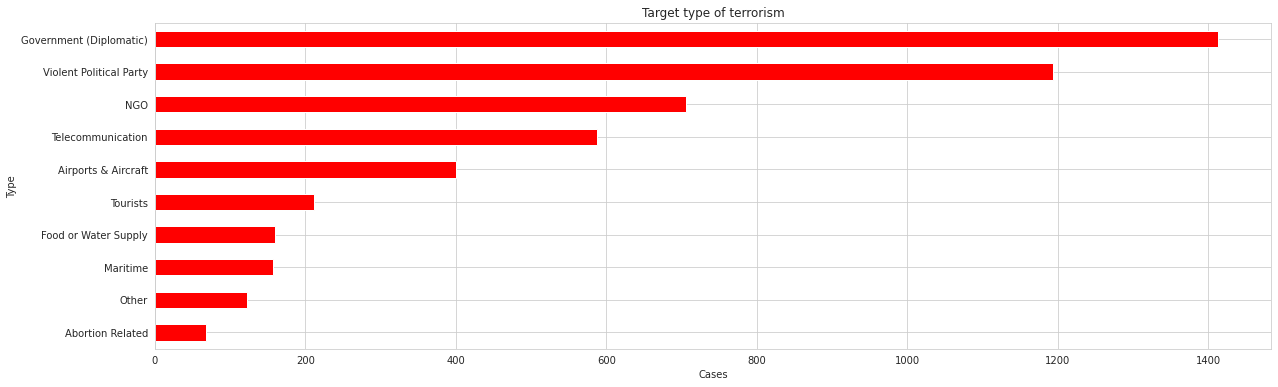

In [ ]:
# Display the number of case for each target type
plt.figure(figsize=(20,6))
terr['TargetType'].value_counts().sort_values().head(10).plot.barh(color="red")
plt.xlabel('Cases')
plt.ylabel('Type')
plt.title('Target type of terrorism')
plt.show()

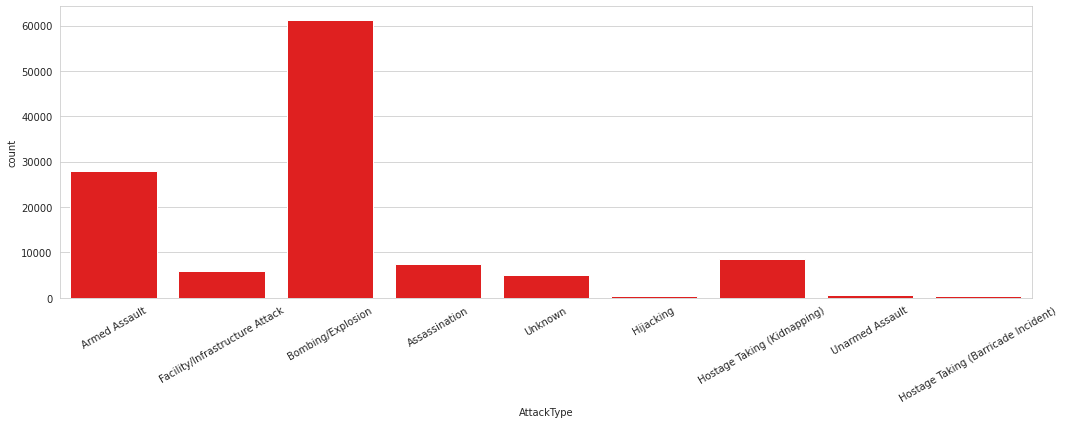

In [ ]:
# number of all AttackType for terrorism
plt.figure(figsize=(15,6))
ax = sns.countplot(x="AttackType", data=terr, color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center")
plt.tight_layout()
plt.show()

### What is the common motive of all kind terrorism in the world
#### Simple word filter

In [ ]:
import re
import wordcloud


# Pick out text from "Motive" column
motive_text = terr['Motive'].tolist()

# Keep only alphabet characters
regex = re.compile('[^A-Za-z0-9\s]+')
whole_text = ' '.join(motive_text)
whole_text = re.sub(regex, '', whole_text)
whole_text

'Unknown Unknown Unknown Unknown Unknown To protest the practice of abortion and to sabotage abortion facilities operating in Oklahoma Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown Unknown U

In [ ]:
def calculate_frequencies(file_contents):
    # List of uninteresting words
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "may","has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "in", "not", "for", "should", "would", "so", "shall", "on", "thou", "thee", "thy", "than", "s","d", "o", "ll", "unknown","specific", \
    "motive","attack","however","noted","claimed","stated","sources","noted","targeted","incident","carried","responsibility","out",\
    "part","violence","because","larger","part","larger","victims","between","trend","against","suspected","members","forces","speculated",\
    "attacks","group","related","security","also","recent","victim","response","occured","minority","state","accused","government"]

    result = {}

    whole_text_words = whole_text.split()
    words_filter = [word for word in whole_text_words if word.lower() not in uninteresting_words]
    for i in words_filter:
      if i not in result:
        result[i] = 1
      else:
        result[i] += 1
    #wordcloud
    cloud = wordcloud.WordCloud(scale=5)
    cloud.generate_from_frequencies(result)
    return cloud.to_array()

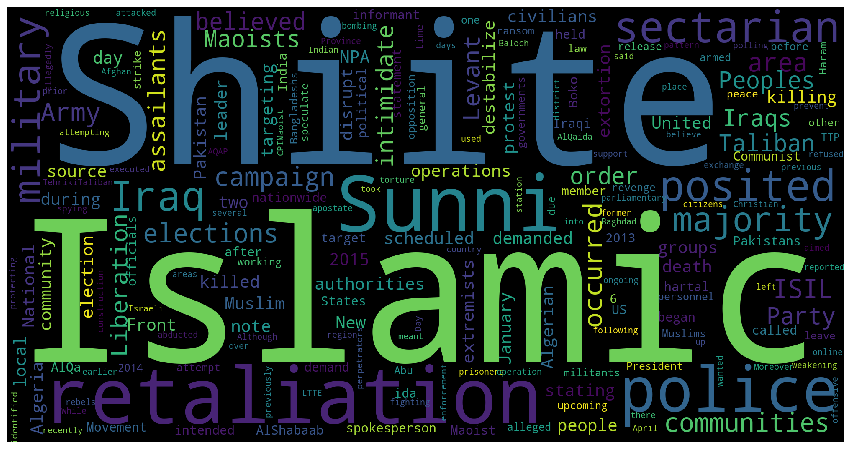

In [ ]:
# Display wordcloud image
myimage = calculate_frequencies(whole_text)
plt.figure(figsize = (15,8))
plt.imshow(myimage, interpolation = 'nearest', aspect='auto')

plt.axis('off')
plt.show()

#### NLP Word filter

In [ ]:
# Instal dependencies
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import string
from matplotlib import rcParams
from nltk import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from subprocess import check_output


In [ ]:
def get_bitrigrams(full_text, threshold=30):
    if isinstance(full_text, str):
        text = full_text
    else:
        text = " ".join(full_text)
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text.split())
    finder.apply_freq_filter(3)
    bigrams = {" ".join(words): "_".join(words)
               for words in finder.above_score(bigram_measures.likelihood_ratio, threshold)}
    return bigrams


def replace_bitrigrams(text, bigrams):
    if isinstance(text, str):
        texts = [text]
    else:
        texts = text
    new_texts = []
    for t in texts:
        t_new = t
        for k, v in bigrams.items():
            t_new = t_new.replace(" " + k + " ", " " + v + " ")
        new_texts.append(t_new)
    if len(new_texts) == 1:
        return new_texts[0]
    else:
        return new_texts


def process_text(text, lemmatizer, translate_table, stopwords):
    processed_text = ""
    for sentence in sent_tokenize(text):
        tagged_sentence = pos_tag(word_tokenize(sentence.translate(translate_table)))
        for word, tag in tagged_sentence:
            word = word.lower()
            if word not in stopwords:
                if tag[0] != 'V':
                    processed_text += lemmatizer.lemmatize(word) + " "
    return processed_text


def get_all_processed_texts(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams = get_bitrigrams(processed_texts)
    very_processed_texts = replace_bitrigrams(processed_texts, bigrams)
    return " ".join(very_processed_texts)


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "may","has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "in", "not", "for", "should", "would", "so", "shall", "on", "thou", "thee", "thy", "than", "s","d", "o", "ll", "unknown","specific", \
    "motive","attack","however","noted","claimed","stated","sources","noted","targeted","incident","carried","responsibility","out",\
    "part","violence","because","larger","part","larger","victims","between","trend","against","suspected","members","forces","speculated",\
    "attacks","group","related","security","also","recent","victim","response","occured","minority","state","accused","government"]
stop = uninteresting_words
stop.extend(stopwords.words('english'))
stop = set(stop)
translate_table = dict((ord(char), " ") for char in string.punctuation)


In [ ]:
motive = terr[(terr['Motive'] != 'Unknown') & (terr['Motive'] != 'The specific motive for the attack is unknown.') 
          & (terr['Motive'] != 'The specific motive for the attack is unknown..')
          & (terr['Motive'] != 'The specific motive for the attack is unknown or was not reported.')
          & (terr['Motive'] != 'The specific motive for the attack is unknown')]
motive = motive['Motive']
motive.value_counts()
print(f"Run in {len(motive.tolist())}")


Run in 19927


In [ ]:
def use_ngrams_only(texts, lemmatizer, translate_table, stopwords):
    processed_texts = []
    for index, doc in enumerate(texts):
        processed_texts.append(process_text(doc, wordnet_lemmatizer, translate_table, stop))
    bigrams = get_bitrigrams(processed_texts)
    indexed_texts = []
    for doc in processed_texts:
        current_doc = []
        for k, v in bigrams.items():
            current_doc += [v] * doc.count(" " + k + " ")
        indexed_texts.append(" ".join(current_doc))
    return " ".join(indexed_texts)

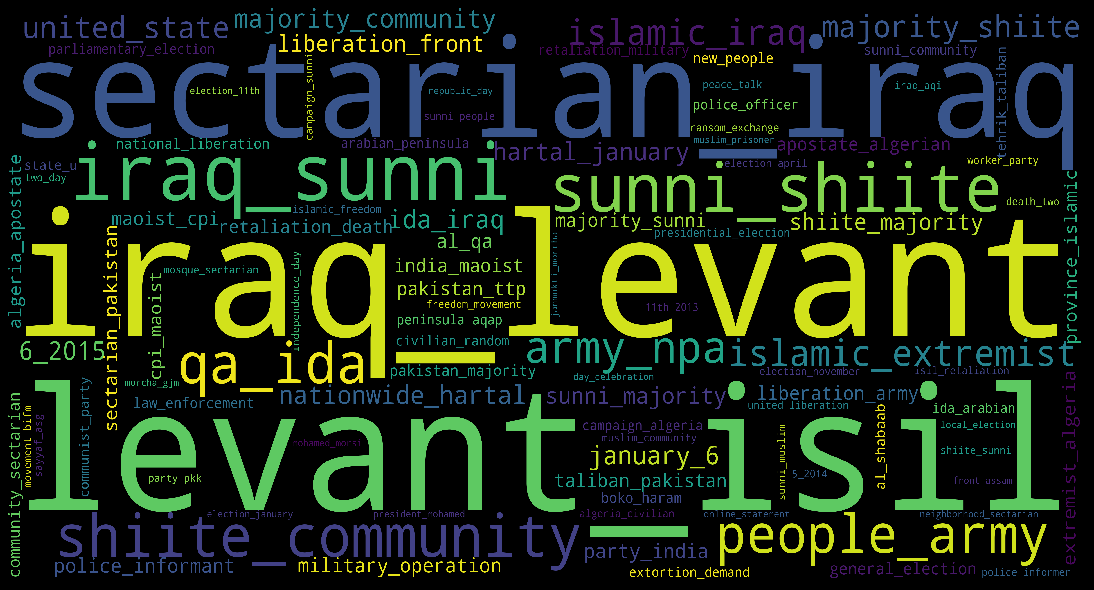

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,width=1200, height=600,scale=5,collocations=False,max_words=100).\
    generate(use_ngrams_only(motive.tolist(), wordnet_lemmatizer, translate_table, stop))
plt.figure(figsize = (15,8),facecolor='k')
plt.imshow(wordcloud.to_array(), interpolation = 'nearest', aspect='auto')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()




### Top 10 Terrorist Groups with Highest Terror Attacks

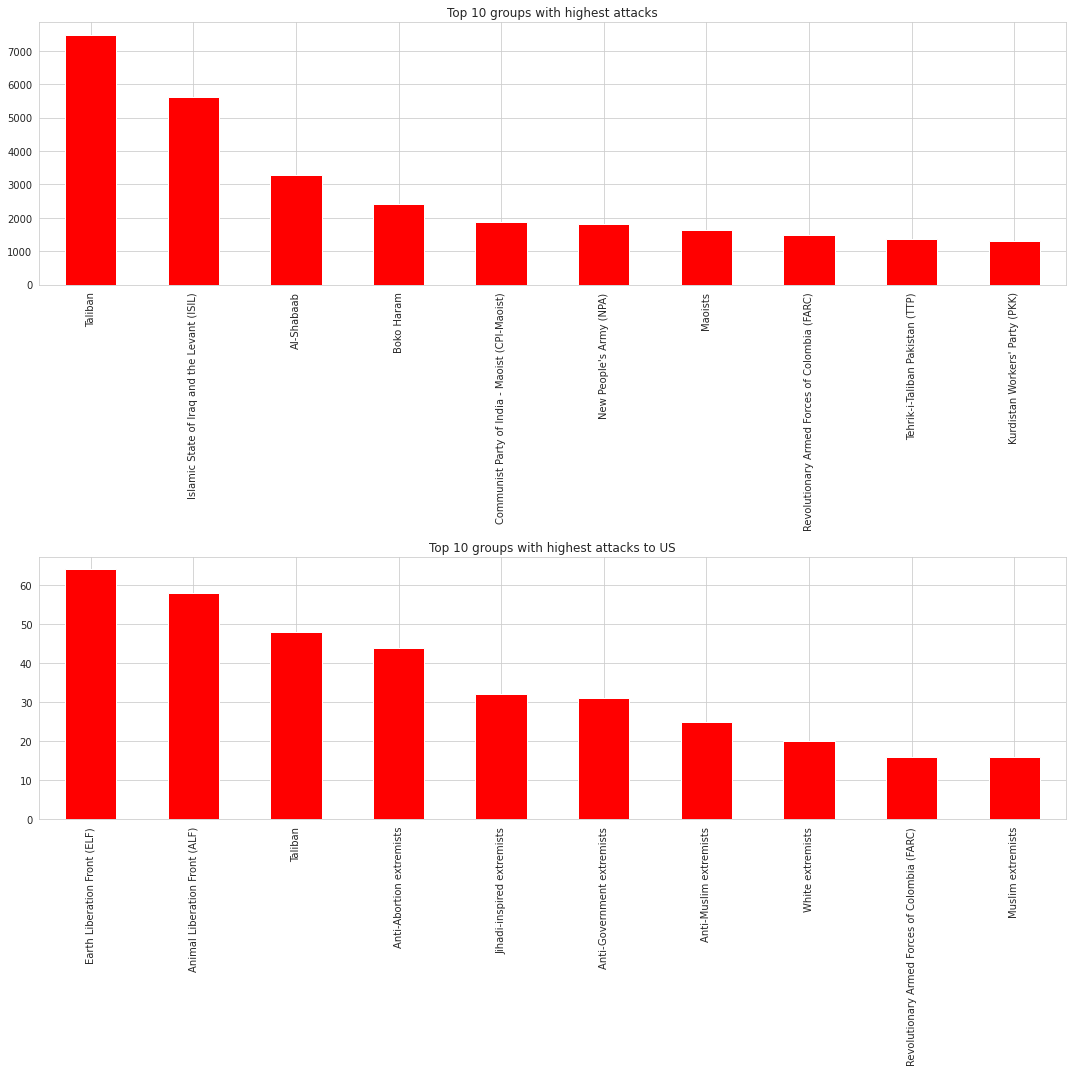

In [ ]:
# Top 10 Terrorist groups with highest Terror Attacks

terr_group = terr["Group"].value_counts().head(11)
terr_group = terr_group[1:]
#Top 10 Terrorist groups with highest Terror Attacks To US
us_terr_incidents = terr[terr['TargetNationality'] == 'United States']
terr_group_us = us_terr_incidents["Group"].value_counts().head(11)
terr_group_us = terr_group_us[1:]
# Plot
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
terr_group.plot(kind = "bar", color = "red")
plt.title("Top 10 groups with highest attacks")

plt.subplot(2,1,2)

terr_group_us.plot(kind = "bar", color = "red")
plt.title("Top 10 groups with highest attacks to US")
plt.tight_layout()

### Growth of damaged property value and casuality of US




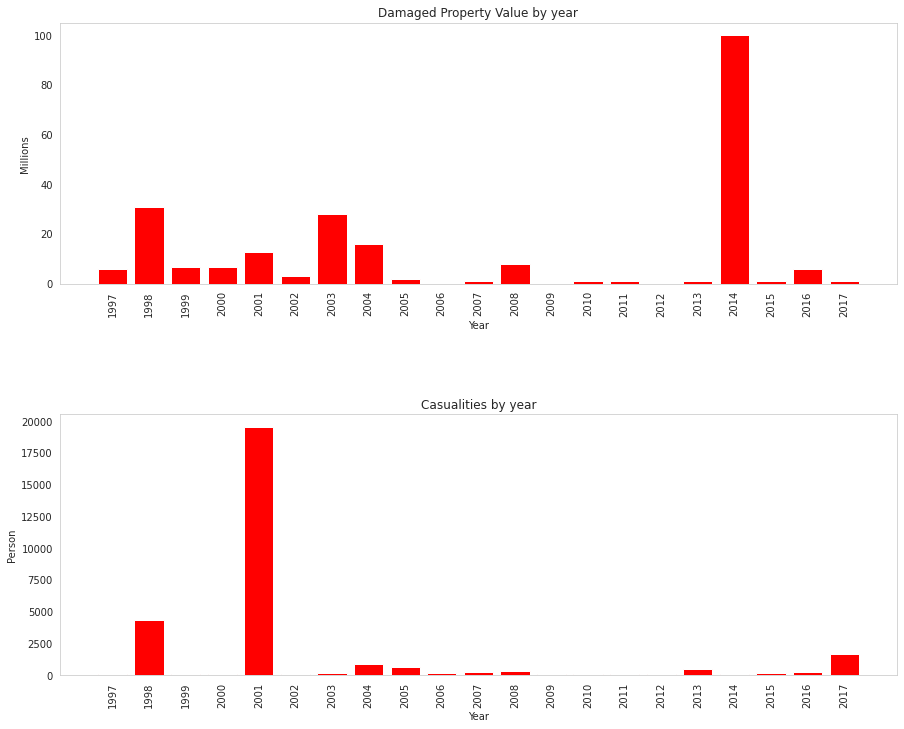

In [ ]:
# Find damaged property value of US
us_terr_incidents = terr[terr['TargetNationality'] == 'United States']
us_property_damage = us_terr_incidents.groupby('Year', as_index=False)['DamagedPropertyValue'].sum()
us_property_damage['DamagedPropertyValue'] = us_property_damage['DamagedPropertyValue'].divide(1e6).apply(np.ceil)

# Find US Casuality
us_casuality = us_terr_incidents.groupby('Year', as_index=False)['Casualities'].sum()['Casualities']


# Draw plot
years = us_property_damage['Year'].tolist()
us_pd = us_property_damage['DamagedPropertyValue'].tolist()

fig, ax = plt.subplots(2,1,figsize = (15,12))
ax[0].bar(years,us_pd,color = "red")
ax[0].set(xlabel='Year',ylabel='Millions',title='Damaged Property Value by year',xticks=years)
ax[0].set_xticklabels(years, rotation=90, ha="center")
ax[0].grid(False)
ax[1].bar(years,us_casuality,color = "red")
ax[1].set(xlabel='Year',ylabel='Person',title='Casualities by year',xticks=years)
ax[1].set_xticklabels(years, rotation=90, ha="center")
ax[1].grid(False)
plt.subplots_adjust(hspace = 0.5)


plt.show()

### Which US target that was attacked mostly?





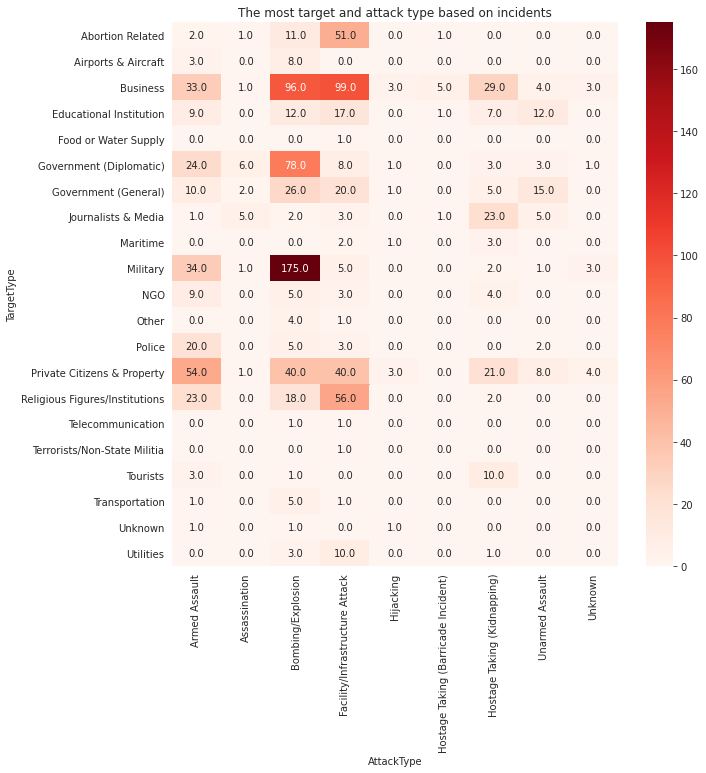

In [ ]:
# Find a target based on attack times
pd_and_at_map = us_terr_incidents.groupby('TargetType',axis=0)['AttackType'].value_counts().unstack().fillna(0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pd_and_at_map, annot=True, fmt=".1f",cmap="Reds")
plt.title("The most target and attack type based on incidents")
plt.show()

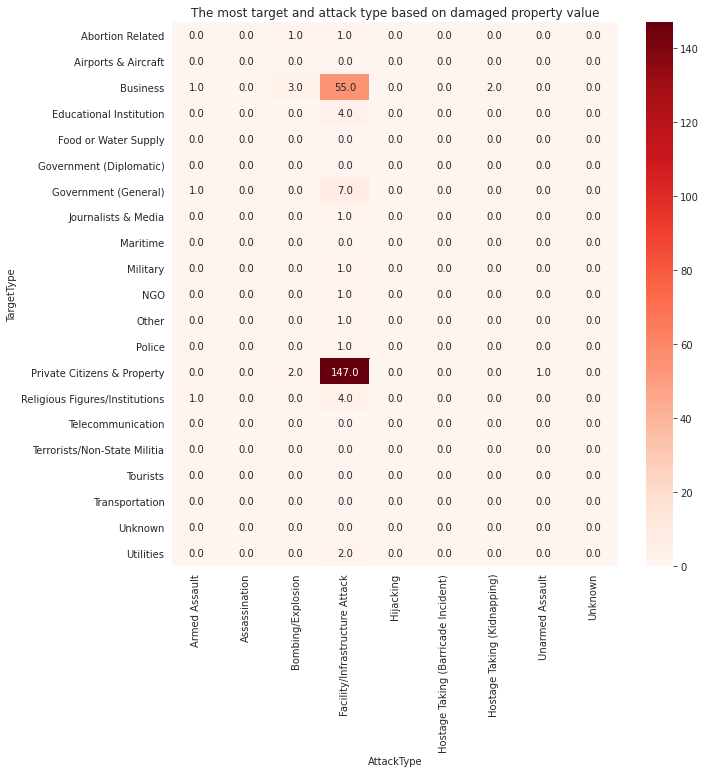

In [ ]:
 # Find a target based on Damage Property value
pd_per_at = us_terr_incidents.groupby(['TargetType','AttackType'],axis=0, as_index=False)['DamagedPropertyValue'].sum()
pd_per_at.sort_values('DamagedPropertyValue', inplace=True, ascending=False)
pd_per_at['DamagedPropertyValue'] = pd_per_at['DamagedPropertyValue'].divide(1e6).apply(np.ceil)
p_d_per_at = pd_per_at.pivot(index='TargetType',columns='AttackType',values='DamagedPropertyValue').fillna(0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(p_d_per_at, annot=True, fmt=".1f",cmap="Reds")
plt.title("The most target and attack type based on damaged property value")
plt.show()

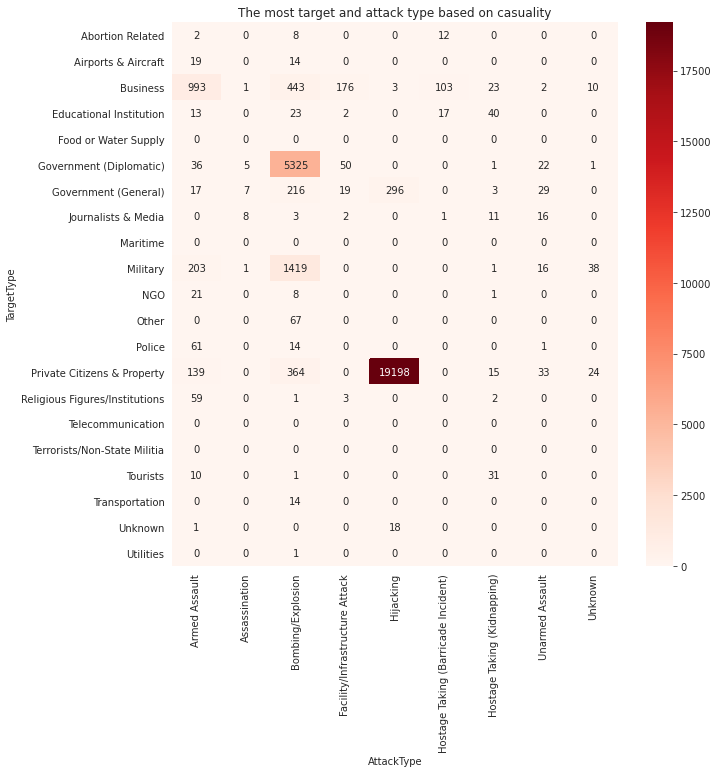

In [ ]:
# Find a target based on casuality
c_per_at = us_terr_incidents.groupby(['TargetType','AttackType'],axis=0, as_index=False)['Casualities'].sum()
c_per_at.sort_values('Casualities', inplace=True, ascending=False)
p_c_per_at = c_per_at.pivot(index='TargetType',columns='AttackType',values='Casualities').fillna(0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(p_c_per_at, annot=True, fmt=".0f",cmap="Reds")
plt.title("The most target and attack type based on casuality")
plt.show()

## Visualizing Geo Data

In [ ]:
# Instal dependencies
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-92rbe34j
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-92rbe34j
     |████████████████████████████████| 14.7MB 310kB/s 
     |████████████████████████████████| 10.4MB 40.7MB/s 
  Created wheel for geopandas: filename=geopandas-0.7.0+15.g898dd86-py2.py3-none-any.whl size=934329 sha256=98577e65155d5b4a4a1202d97306455c4ac1eae64e3c4f510c1f8435198b0894
  Stored in directory: /tmp/pip-ephem-wheel-cache-c157giw3/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.


In [ ]:
# Import libraries
import geopandas as gpd
import geoplot as gplt

In [ ]:
# Import Geo Data
geo_data = gpd.read_file('/content/drive/My Drive/FTMLE - Tonga/Data/geo_data/ne_10m_admin_0_countries.shp')

In [ ]:
geo_data['CONTINENT'].unique()

array(['Asia', 'South America', 'Africa', 'Europe', 'North America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [ ]:
# Select only relavant data i.e. Country & geometry
# geo_data = geo_data[['SOVEREIGNT', 'geometry']]
geo_data = geo_data[(geo_data['CONTINENT'] == 'Asia')][['SOVEREIGNT', 'geometry']]
geo_data.columns = ['country', 'geometry']

In [ ]:
geo_data['country'].unique()

array(['Indonesia', 'Malaysia', 'United Kingdom', 'Cyprus', 'India',
       'China', 'Israel', 'Lebanon', 'Pakistan', 'Syria', 'South Korea',
       'North Korea', 'Bhutan', 'Oman', 'Uzbekistan', 'Kazakhstan',
       'Tajikistan', 'Mongolia', 'Vietnam', 'Cambodia',
       'United Arab Emirates', 'Georgia', 'Azerbaijan', 'Turkey', 'Laos',
       'Kyrgyzstan', 'Armenia', 'Iraq', 'Iran', 'Qatar', 'Saudi Arabia',
       'Thailand', 'Kuwait', 'East Timor', 'Brunei', 'Myanmar',
       'Bangladesh', 'Afghanistan', 'Turkmenistan', 'Jordan', 'Nepal',
       'Yemen', 'Northern Cyprus', 'Cyprus No Mans Area', 'Kashmir',
       'Philippines', 'Sri Lanka', 'Taiwan', 'Japan', 'Australia',
       'Singapore', 'Bahrain', 'Spratly Islands', 'Scarborough Reef'],
      dtype=object)

In [ ]:
# Create terrorist data
terr_data = terr


In [ ]:

# Make sure that the Country columns in two datasets are matching3
for c in terr_data['Country'].value_counts().index:
  if c not in geo_data['country'].value_counts().index:
    print(c)


Somalia
Nigeria
Colombia
Libya
Egypt
Russia
Algeria
Ukraine
West Bank and Gaza Strip
Sudan
Democratic Republic of the Congo
France
Greece
Kenya
United States
Spain
Mali
Burundi
Cameroon
Central African Republic
Uganda
Germany
South Sudan
Mexico
Kosovo
Ireland
South Africa
Mozambique
Yugoslavia
Italy
Peru
Angola
Niger
Macedonia
Ethiopia
Chile
Venezuela
Tunisia
Sweden
Bosnia-Herzegovina
Paraguay
Chad
Senegal
Rwanda
Brazil
Albania
Canada
Ivory Coast
Tanzania
Haiti
Burkina Faso
Sierra Leone
Guatemala
Ecuador
Honduras
Argentina
Belgium
Zimbabwe
Namibia
Republic of the Congo
Netherlands
Hungary
Czech Republic
Bulgaria
Macau
Maldives
Austria
Croatia
Switzerland
Guinea
Zambia
Finland
Cuba
Liberia
Dominican Republic
Madagascar
Bolivia
Mauritania
Morocco
Latvia
Jamaica
Belarus
Papua New Guinea
New Zealand
Guyana
Serbia
Serbia-Montenegro
Nicaragua
Panama
Poland
Denmark
Slovak Republic
Guinea-Bissau
Fiji
Swaziland
Norway
Eritrea
Trinidad and Tobago
Malta
Moldova
Djibouti
Zaire
Estonia
Hong Kong
Mo

In [ ]:
# Replace unmatched values
replace_country = {'United States': 'United States of America',
                   'Northern Ireland': 'United Kingdom',
                   'Great Britain': 'United Kingdom',
                   'Macau':'China',
                   'Hong Kong':'China',
                   'St. Lucia': 'Saint Lucia',
                   'Czech Republic': 'Czechia'}


terr_data['Country'].replace(replace_country, inplace = True)

terr_data = terr_data[terr_data['Country'].isin(geo_data['country'].value_counts().index)]
terr_data['Region'].unique()
terr_data = terr_data[terr_data['Region'] == 'Middle East & North Africa']


In [ ]:
 # Get incidents per country
#  plot_data = terr_data.groupby('Country')[['ID']].count()
#  plot_data.columns = ['IncidentCount']
print(plot_data)

KeyError: ignored

In [ ]:
# Merge two datasets to add geometry info
# plot_data = plot_data.merge(geo_data, how= 'right', left_index = True, right_on = 'country')
# plot_data.dropna(inplace=True)


NameError: ignored

In [ ]:
# Convert the Pandas DataFrame to a GeoPandas DataFrame
plot_data = gpd.GeoDataFrame(plot_data, geometry = 'geometry')

In [ ]:
# Plot 
gplt.choropleth(plot_data, hue = 'IncidentCount', cmap = 'Reds', figsize = (10,10), legend=True)


#Add data label to the map
plot_data['coords'] = plot_data['geometry'].apply(lambda x: x.representative_point().coords[:])
plot_data['coords'] = [coords[0] for coords in plot_data['coords']]
top_5_data = plot_data.head(5)
for _, data in top_5_data.iterrows():

  plt.text(x = data['coords'][0], y = data['coords'][1], 
           s = data['country'], ha = 'center', color = 'red')
  plt.text(x = data['coords'][0], y = data['coords'][1] - 2, 
          s = f"Incident: {data['IncidentCount']:.2f}", ha = 'center', color = 'red')
